In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from core.mutual_information_1 import *
from scipy.stats import ks_2samp

In [12]:
def ensure_directory_exists(directory_path):
    """
    Checks if a directory exists, and creates it if it does not.

    :param directory_path: Path of the directory to check/create.
    """
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"Directory created: {directory_path}")
    else:
        print(f"Directory {directory_path} already existed. You might have overwritten the data!")
        

def two_sample_ks(mi_A, mi_C, alpha):
    # Two-sample Kolmogorov-Smirnov test
    test_statistics, p_value = ks_2samp(mi_A, mi_C)

    # Results
    print("Statistic KS:", test_statistics)
    print("p-value:", p_value)

    alpha = 0.05
    if p_value < alpha:
        print(f"The two samples have significantly different distributions (at the {int(alpha*100)} % significance level).")
    else:
        print("There is not enough evidence to assert that the two samples come from different distributions.")

# import RAW DATA

In [8]:
# Percorso della cartella "real_dataset"
directory_path = "data/real_data/raw_data"

# Dizionari per memorizzare i dati
data_dict_A = {}
data_dict_C = {}

# Liste per creare un DataFrame con le statistiche
data_rows = []

# Scansiona i file nella cartella
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path) and filename.lower() != "readme":
        try:
            # Legge i dati e converte in array NumPy
            data = pd.read_csv(file_path, delim_whitespace=True, header=None).values

            # Determina il gruppo (A o C) e salva nei dizionari appropriati
            group = 'A' if filename.startswith("A") else 'C'
            if group == 'A':
                data_dict_A[filename] = data
            else:
                data_dict_C[filename] = data

            print(f"File '{filename}' elaborato con successo.")

        except Exception as e:
            print(f"Errore durante l'elaborazione di '{filename}': {e}")

File 'A14F3-TE10034' elaborato con successo.
File 'A14F4-TE10034' elaborato con successo.
File 'A15F3-TE10034' elaborato con successo.
File 'A15F4-TE10034' elaborato con successo.
File 'A16F3-TE10034' elaborato con successo.
File 'C11F3-VE' elaborato con successo.
File 'C11F4-VE' elaborato con successo.
File 'C12F3-VE' elaborato con successo.
File 'C13F3-VE' elaborato con successo.
File 'C13F4-VE' elaborato con successo.
Errore durante l'elaborazione di 'README.txt': Error tokenizing data. C error: Expected 9 fields in line 2, saw 10



# data trasformation: A/C

In [ ]:
# A data
n = 5000 # windows lenght
h = n // 2  # overlapping parameter
k = 1 # k-nearest neighbor


mi_list = []
for name in data_dict_A.keys():
    # data
    data_array = data_dict_A[name]
    
    # number of windows
    i = 0
    while (i*h + n) <= len(data_array):
        i+=1
    i_max = i # actually we are interested in i-1, but for the subquent for cycle is reasonable to save i_max=i
    print(f'number of windows for {name} = {i_max}')
    
    # mi computation
    start = time.time()
    for j in range(i_max): # j=0,...,i_max-1
        mi_list.append(mutual_information_1(data_array[j*h: (j*h + n)], k=k)) # compute mi for each window
    end = time.time() - start
    print(f'run time for {name}= {end/60} min')
    
mi_A = np.array(mi_list)
directory_path = f'data/real_data/n_{n}/h_{h}/k_{k}/A'
ensure_directory_exists(directory_path)
file_name = f"mi_A.txt"
file_path = os.path.join(directory_path, file_name)
np.savetxt(file_path, mi_A)

In [ ]:
# C data
n = 5000 # windows lenght
h = n // 2  # overlapping parameter
k = 1  # k-nearest neighbor

mi_list = []
for name in data_dict_C.keys():
    # data
    data_array = data_dict_C[name]
    
    # number of windows
    i = 0
    while (i*h + n) <= len(data_array):
        i+=1
    i_max = i  # actually we are interested in i-1, but for the subquent for cycle is reasonable to save i_max=i
    print(f'number of windows for {name} = {i_max}')
    
    # mi computation
    start = time.time()
    for j in range(i_max): # j=0,...,i_max-1
        mi_list.append(mutual_information_1(data_array[j*h: (j*h + n)], k=k)) # compute mi for each window
    end = time.time() - start
    print(f'run time for {name}= {end/60} min')
    
mi_C = np.array(mi_list)
directory_path = f'data/real_data/n_{n}/h_{h}/k_{k}/C'
ensure_directory_exists(directory_path)
file_name = f"mi_C.txt"
file_path = os.path.join(directory_path, file_name)
np.savetxt(file_path, mi_C)

### data analysis

In [21]:
# import C mi data

file_path_C = 'data/real_data/n_5000/h_2500/k_1/C/mi_C.txt'

# file loading as numpy array
try:
    
    mi_C = np.loadtxt(file_path_C)
    
except Exception as e:
    print(f"Error while loading file: {e}")
    
    
# import A mi data

file_path_A = 'data/real_data/n_5000/h_2500/k_1/A/mi_A.txt'

# file loading as numpy array
try:

    mi_A = np.loadtxt(file_path_A)
    
except Exception as e:
    print(f"Error while loading file: {e}")

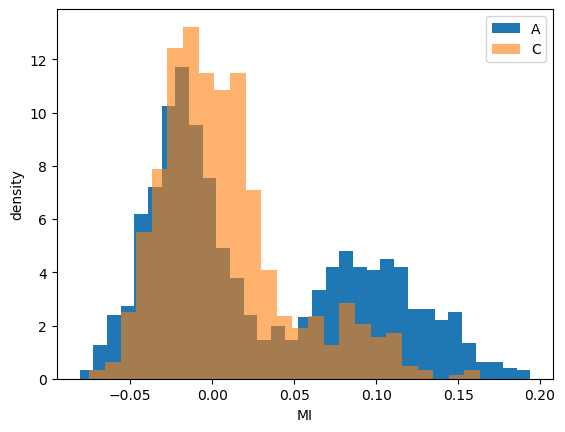

Statistic KS: 0.23994962704640124
p-value: 8.809337762017645e-22
The two samples have significantly different distributions (at the 5 % significance level).


In [50]:
plt.hist(mi_A, density=True, bins=int(np.sqrt(len(mi_A))), label='A')
plt.hist(mi_C, density=True, bins=int(np.sqrt(len(mi_C))), label='C', alpha=0.6)

plt.legend()
plt.ylabel('density')
plt.xlabel('MI')
plt.show()

# Two-sample Kolmogorov-Smirnov test
alpha = 0.05
two_sample_ks(mi_A, mi_C, alpha)

# data trasformation: single file

In [20]:
# C data
n = 5000 # windows lenght
h = n // 2  # overlapping parameter
k = 1  # k-nearest neighbor


for name in data_dict_C.keys():
    start = time.time()
    # data
    data_array = data_dict_C[name]
    
    # number of windows
    i = 0
    while (i*h + n) <= len(data_array):
        i+=1
    i_max = i  # actually we are interested in i-1, but for the subquent for cycle is reasonable to save i_max=i
    print(f'\nnumber of windows for {name} = {i_max}')
    
    # mi computation
    
    mi_array = np.zeros(i_max)
    for j in range(i_max): # j=0,...,i_max-1
        mi_array[j] = mutual_information_1(data_array[j*h: (j*h + n)], k=k) # compute mi for each window
        
    # save reuslts
    directory_path = f'data/real_data/n_{n}/h_{h}/k_{k}/C'
    ensure_directory_exists(directory_path)
    file_name = f"mi_{name}.txt"
    file_path = os.path.join(directory_path, file_name)
    np.savetxt(file_path, mi_array)
    
    end = time.time() - start
    print(f'run time for {name}= {end/60} min')
    

number of windows for C11F3-VE = 190
Directory data/real_data/n_5000/h_2500/k_1 already existed. You might have overwritten the data!
run time for C11F3-VE= 3.456914289792379 min
number of windows for C11F4-VE = 192
Directory data/real_data/n_5000/h_2500/k_1 already existed. You might have overwritten the data!
run time for C11F4-VE= 3.876641261577606 min
number of windows for C12F3-VE = 94
Directory data/real_data/n_5000/h_2500/k_1 already existed. You might have overwritten the data!
run time for C12F3-VE= 2.044418485959371 min
number of windows for C13F3-VE = 88
Directory data/real_data/n_5000/h_2500/k_1 already existed. You might have overwritten the data!
run time for C13F3-VE= 1.8745665987332663 min
number of windows for C13F4-VE = 102
Directory data/real_data/n_5000/h_2500/k_1 already existed. You might have overwritten the data!
run time for C13F4-VE= 2.358857731024424 min


In [ ]:
# A data
n = 5000 # windows lenght
h = n // 2  # overlapping parameter
k = 1  # k-nearest neighbor


for name in data_dict_A.keys():
    start = time.time()
    # data
    data_array = data_dict_A[name]
    
    # number of windows
    i = 0
    while (i*h + n) <= len(data_array):
        i+=1
    i_max = i  # actually we are interested in i-1, but for the subquent for cycle is reasonable to save i_max=i
    print(f'\nnumber of windows for {name} = {i_max}')
    
    # mi computation
    
    mi_array = np.zeros(i_max)
    for j in range(i_max): # j=0,...,i_max-1
        mi_array[j] = mutual_information_1(data_array[j*h: (j*h + n)], k=k) # compute mi for each window
        
    # save reuslts
    directory_path = f'data/real_data/n_{n}/h_{h}/k_{k}/A'
    ensure_directory_exists(directory_path)
    file_name = f"mi_{name}.txt"
    file_path = os.path.join(directory_path, file_name)
    np.savetxt(file_path, mi_array)
    
    end = time.time() - start
    print(f'run time for {name}= {end/60} min')

### data analysis

In [48]:
# import C mi data

file_path_C = 'data/real_data/n_5000/h_2500/k_1/C/mi_C13F3-VE.txt'

# file loading as numpy array
try:
    
    mi_single_C = np.loadtxt(file_path_C)
    
except Exception as e:
    print(f"Error while loading file: {e}")
    
    
# import A mi data

file_path_A = 'data/real_data/n_5000/h_2500/k_1/A/mi_A14F3-TE10034.txt'

# file loading as numpy array
try:

    mi_single_A = np.loadtxt(file_path_A)
    
except Exception as e:
    print(f"Error while loading file: {e}")
    

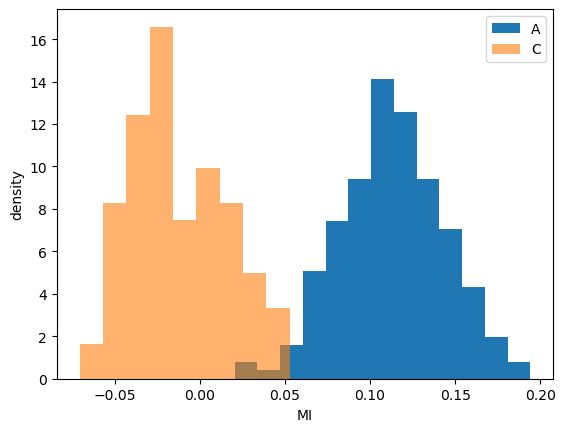

Statistic KS: 0.9842931937172775
p-value: 1.3932102833888244e-69
The two samples have significantly different distributions (at the 5 % significance level).


In [49]:
# histograms
plt.hist(mi_single_A, density=True, bins=int(np.sqrt(len(mi_single_A))), label='A')
plt.hist(mi_single_C, density=True, bins=int(np.sqrt(len(mi_single_C))), label='C', alpha=0.6)

plt.legend()
plt.ylabel('density')
plt.xlabel('MI')
plt.show()

# Two-sample Kolmogorov-Smirnov test
alpha = 0.05
two_sample_ks(mi_single_A, mi_single_C, alpha)